In [1]:
import numpy as np
from matplotlib import pyplot as plt

import M8195A as awg
awg_ip = "192.168.0.250"

from sigproc_kit import *

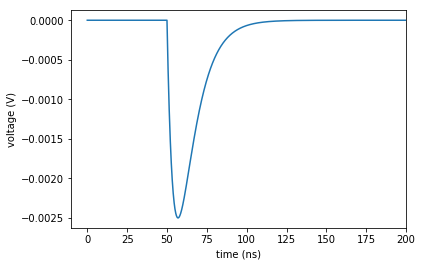

target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64992000000.000000 Hz
success!
preparing data for channel 2
sending data ...
set output voltage ...
Output 2 on ...
RUN!
close socket


In [78]:
##################################################
##               detector signal                ##
##################################################


period = 4e-6

x=np.arange(0,period,0.1e-9)

#y=detector_signal_function(<time vector>, Q, tau1, tau1, delay)
y=detector_signal_function(x,-1e-12,5e-9,10e-9,50e-9)

y_att = y*10**(30/20)

plt.plot(x*1e9,y)
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.xlim(-10,200)
plt.show()

awg.send_data(x,y_att,
              trace=2,
              ip=awg_ip,
              period=period)

In [84]:
##################################################
##               delta pulse                ##
##################################################



awg.pulser(
    trace=2,
    ip=awg_ip,
    on_val=-500e-3,
    width=2e-9,
    leading_edge=.2e-9,
    trailing_edge=.2e-9,
    delay=3e-9,
    period=period
)
awg.pulser(
    trace=3,
    ip=awg_ip,
    on_val=500e-3,
    width=2e-9,
    leading_edge=.2e-9,
    trailing_edge=.2e-9,
    delay=3e-9,
    period=period
)

target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64992000000.000000 Hz
success!
preparing data for channel 2
sending data ...
set output voltage ...
Output 2 on ...
RUN!
close socket
target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64992000000.000000 Hz
success!
preparing data for channel 3
sending data ...
set output voltage ...
Output 3 on ...
RUN!
close socket


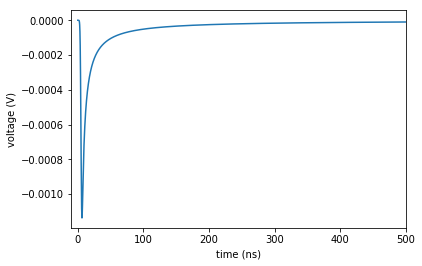

target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64992000000.000000 Hz
success!
preparing data for channel 2
sending data ...
set output voltage ...
Output 2 on ...
RUN!
close socket
target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64992000000.000000 Hz
success!
preparing data for channel 3
sending data ...
set output voltage ...
Output 3 on ...
RUN!
close socket


In [88]:
##################################################
##               detector signal                ##
##################################################

def func_1_over_t(x, A,t0, delay):
    x_ = x - delay
    
    return (x_ > 0) * A * 1/(abs(x_+t0)+1e-12)

def ion_sig(x,A,t0,delay,sigma):
    time_vec = func_1_over_t(x, A,t0, delay)
    time_vec = fft_gauss_LPF(x,time_vec,sigma=sigma)
    return time_vec



period = 4e-6

x=np.arange(0,period,0.1e-9)

#def ion_sig(x,A,t0,delay,sigma):
y=ion_sig(x,-0.5e-11,2.6e-9,5e-9,1e-9)

y_att = y*10**(30/20)

plt.plot(x*1e9,y)
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.xlim(-10,500)
plt.show()

awg.send_data(x,y_att,
              trace=2,
              ip=awg_ip,
              period=period)
awg.send_data(x,-y_att,
              trace=3,
              ip=awg_ip,
              period=period)

In [80]:
##################################################
##               reference pulse                ##
##################################################

awg.pulser(
    trace=1,
    ip=awg_ip,
    on_val=300e-3,
    width=50e-9,
    leading_edge=2e-9,
    trailing_edge=2e-9,
    delay=0e-9,
    period=period
)

target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64992000000.000000 Hz
success!
preparing data for channel 1
sending data ...
set output voltage ...
Output 1 on ...
RUN!
close socket
